In [ ]:
# This notebook graphs the correlation betwen inflation and savings over time for each country in the IMF.
# Overall, the correlations between inflation and savings is not strong.

In [2]:
import pandas as pd
import numpy as np

WEO = pd.read_excel("E:\Downloads\Data Incubator\IMF\WEOApr2018all.xlsx")

In [3]:
inflat = WEO[WEO['WEO Subject Code'] == 'PCPIPCH']
savings = WEO[WEO['WEO Subject Code'] == 'NGSD_NGDP']

In [11]:
r_count = np.zeros(len(inflat))-100
countries = inflat['Country'].unique()

for i in range(0,len(countries)):
    country = countries[i]
    c_inflat = inflat[inflat['Country'] == country]
    d_inflat = c_inflat.iloc[:, 9:36]
    c_savings = savings[savings['Country'] == country]
    d_savings = c_savings.iloc[:, 9:36]
    in_sv = pd.concat([d_inflat, d_savings],keys=['in', 'sv'])
    in_sv[in_sv==0] = np.nan
    in_sv = in_sv.dropna(axis=1, how='any')
    in_sv[in_sv=='--'] = np.nan
    in_val = np.float32(in_sv[0:1].values)
    sv_val = np.float32(in_sv[1:2].values)
    if (in_val.size> 9) & (sv_val.size> 9):
        r_val= np.corrcoef(in_val,sv_val)
        r_count[i] = r_val[0,1]
r_count = r_count[~np.isnan(r_count)]
r_count = r_count[~(r_count==-100)]
print(r_count)

[-0.40774563 -0.41008084  0.1253176  -0.24953639 -0.15974925 -0.08785291
 -0.4842595  -0.5389283   0.67183924 -0.64588484  0.15656739 -0.65580604
 -0.77748273  0.32898817  0.26651113 -0.3687979   0.12085729 -0.11328028
  0.55459935  0.16871368  0.17403535 -0.37989211 -0.31716003  0.44249912
  0.03820604 -0.21726401  0.28280857 -0.50872708  0.04476454  0.01539799
  0.20987852 -0.16314815 -0.26516624 -0.18341929  0.23603211 -0.8758659
  0.50206572  0.69926007 -0.56080442  0.29354917 -0.1313978  -0.06819024
 -0.11112945  0.02109774 -0.35242916 -0.47195075 -0.18497953  0.06799697
 -0.11370027  0.23619819  0.18573325  0.23809906 -0.28059335 -0.36382065
  0.64736164 -0.1405984  -0.5061013   0.0662995  -0.01654177 -0.11625712
  0.38189915  0.23811603 -0.19920302  0.75146874 -0.54181884 -0.40218514
 -0.31583797 -0.51180342 -0.49711737 -0.03869717  0.52746869  0.38128557
 -0.20982492 -0.24592527 -0.46883879 -0.27972375 -0.77912673 -0.32474798
 -0.12725566  0.21613035 -0.31087074 -0.57365968 -0.

In [13]:
print(np.mean(r_count))

-0.0848357125956


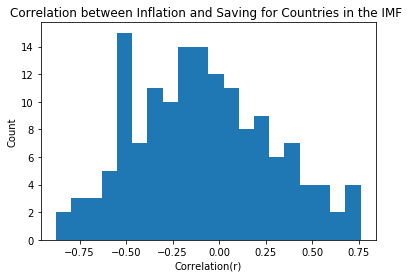

In [12]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# the histogram of the data
plt.hist(r_count, bins=20)

plt.xlabel('Correlation(r)')
plt.ylabel('Count')
plt.title('Correlation between Inflation and Saving for Countries in the IMF ')

plt.show()